# Codecademy National Basketball Association Trends

This project analyzes data from the NBA (National Basketball Association) and explores possible associations between various quantitative and categorical variables. 

   - Origional Source: [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo)

   - Raw Dataset: [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

   - Review Full Database Schema: [538 GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/nba-elo).


### Importing Python Libraries

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

### Presentation Enhancment

In [39]:
np.set_printoptions(suppress=True, precision = 2)

### Reading CSV File Into Jupyter

In [40]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


## Analyzing Relationships Between Quantitative and Categorical Variables

### Subsetting Data Into 2010 & 2014 Seasons

In [41]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Subsetting Data Into 2010 Seasons

In [42]:
knicks_points_10 = nba.pts[nba.fran_id == 'Knicks']
nets_points_10 = nba.pts[nba.fran_id == 'Nets']

### Calculating Difference In 2010 Mean Points Between Knicks & Nets

In [43]:
diff_means_2010 = np.mean(knicks_points_10) - np.mean(nets_points_10)
print(diff_means_2010)

-0.7855378576240639


### Histogram Comparison of 2010 Scores of Knicks & Nets

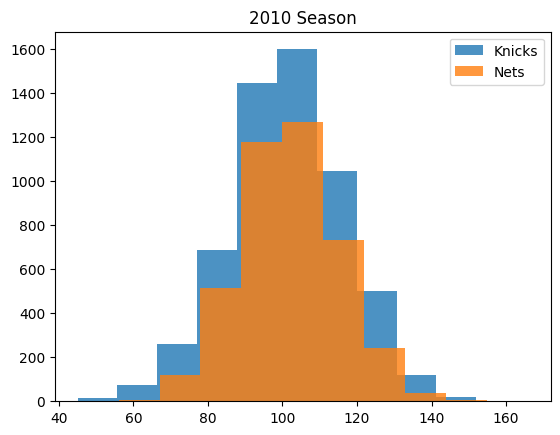

In [44]:
plt.hist(knicks_points_10, alpha=0.8, label='Knicks')
plt.hist(nets_points_10, alpha=0.8, label='Nets')
plt.legend()
plt.title('2010 Season')
plt.show()
plt.close()

### Subsetting Data From 2014 Season


In [45]:
knicks_points_14 = nba_2014.pts[nba.fran_id == 'Knicks']
nets_points_14 = nba_2014.pts[nba.fran_id == 'Nets']

### Calculating Difference In Mean 2014 Points Between Knicks and Nets

In [46]:
diff_means_14 = np.mean(knicks_points_14) - np.mean(nets_points_14)
print(diff_means_14)

0.44706798131809933


### Histogram Comparison of 2014 Scores For Knicks & Nets

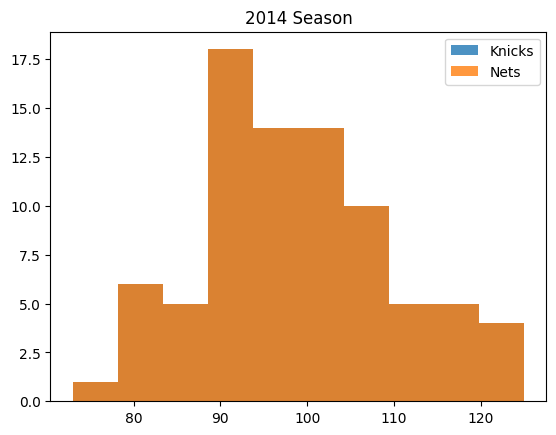

In [48]:
plt.hist(knicks_points_14, alpha=0.8, label='Knicks')
plt.hist(knicks_points_14, alpha=0.8, label='Nets')
plt.legend()
plt.title('2014 Season')
plt.show()
plt.close()

### Boxplots Analysis Of Points Scored By Team


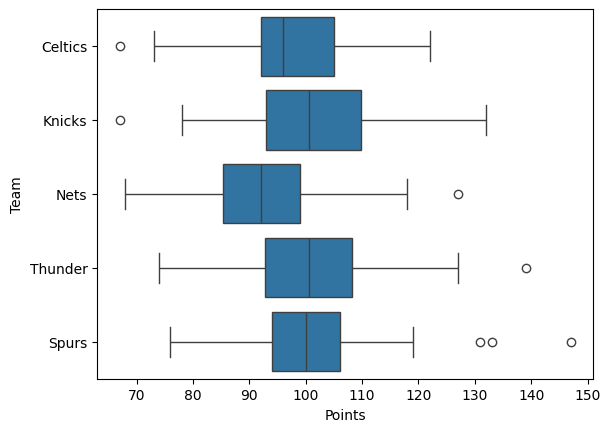

In [50]:
plt.clf()
sns.boxplot(data=nba_2010, x='pts', y='fran_id')
plt.xlabel('Points')
plt.ylabel('Team')
plt.show()
plt.close()

## Analyzing Relationships Between Categorical Variables

### Frequency Table Calculation For Counts of Game Result & Location

In [51]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


### Converting Table Frequencies Into Proportions

In [52]:
location_results_proportions = pd.crosstab(nba_2010.game_result, nba_2010.game_location) / len(nba_2010)
print(location_results_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


### Calculate Expected Contingency Table & Chi-Square Statistic.

In [53]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


### Calculating Covariance Between Forecast and Point Differential

In [54]:
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


### Calculating Correlation Between Forecast and Point Differential.

In [55]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.44020887084680826, pvalue=9.410391573139846e-23)


### Scatter Plotting Forecast & Point Differential

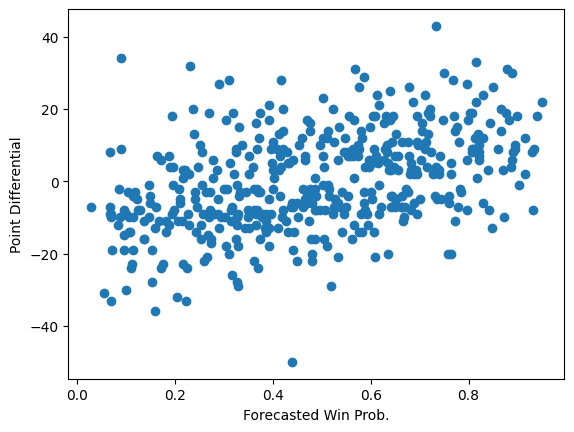

In [56]:
plt.clf()
plt.scatter(data=nba_2010, x='forecast', y='point_diff')
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()
plt.close()